<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Vegetable_Image_Classification_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

# Visualise the Images

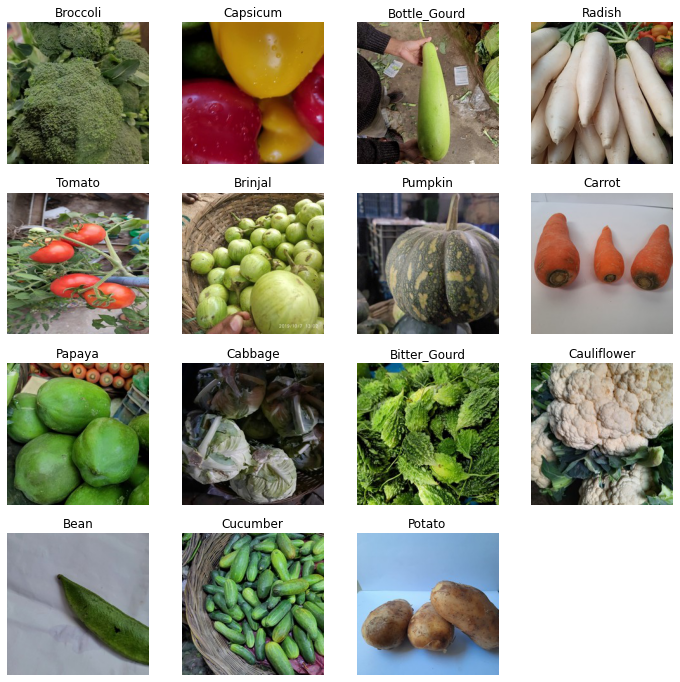

In [ ]:
# Let's plot a few images
train_path = "../input/vegetable-image-dataset/Vegetable Images/train"
validation_path = "../input/vegetable-image-dataset/Vegetable Images/validation"
test_path = "../input/vegetable-image-dataset/Vegetable Images/test"

image_categories = os.listdir('../input/vegetable-image-dataset/Vegetable Images/train')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)
        

# Prepare the Dataset

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


# Building a CNN model

In [ ]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

2022-01-08 16:44:39.453112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11214976  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

2022-01-08 16:44:39.538290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 16:44:39.539038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 16:44:39.540742: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-08 16:44:39.541458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

2022-01-08 16:44:42.051882: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-01-08 16:44:43.552025: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


468/468 [==============================] - 153s 312ms/step - loss: 1.3437 - accuracy: 0.5605 - val_loss: 0.5466 - val_accuracy: 0.8374
Epoch 2/100
468/468 [==============================] - 33s 71ms/step - loss: 0.5739 - accuracy: 0.8143 - val_loss: 0.2986 - val_accuracy: 0.9130
Epoch 3/100
468/468 [==============================] - 33s 70ms/step - loss: 0.3304 - accuracy: 0.8955 - val_loss: 0.3109 - val_accuracy: 0.9042
Epoch 4/100
468/468 [==============================] - 33s 71ms/step - loss: 0.2205 - accuracy: 0.9285 - val_loss: 0.2329 - val_accuracy: 0.9315
Epoch 5/100
468/468 [==============================] - 33s 70ms/step - loss: 0.1665 - accuracy: 0.9450 - val_loss: 0.2349 - val_accuracy: 0.9328
Epoch 6/100
468/468 [==============================] - 33s 71ms/step - loss: 0.1273 - accuracy: 0.9592 - val_loss: 0.2608 - val_accuracy: 0.9308
Epoch 7/100
468/468 [==============================] - 33s 70ms/step - loss: 0.1300 - accuracy: 0.9584 - val_loss: 0.2361 - val_accuracy: 0.

**Model trained for 15 Epochs**

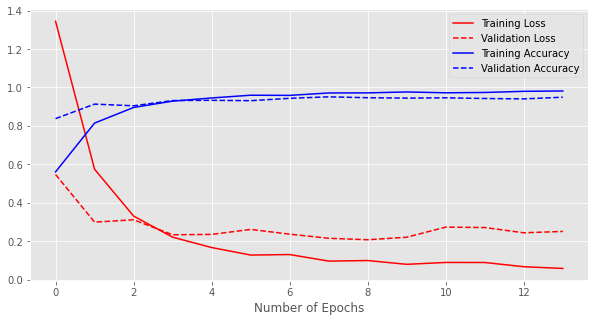

In [ ]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [ ]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

94/94 [==============================] - 25s 266ms/step - loss: 0.2218 - accuracy: 0.9547


[0.2217559963464737, 0.9546666741371155]

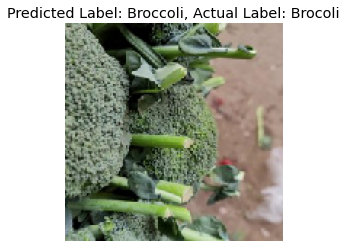

In [ ]:
# Testing the Model
test_image_path = '../input/vegetable-image-dataset/Vegetable Images/test/Broccoli/1011.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Brocoli')

In [ ]:
# Let's test the model on an image from an external source
!wget "https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg?dl=0"

--2022-01-08 16:56:59--  https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/i020rz847u8bq09/beans.jpg [following]
--2022-01-08 16:57:00--  https://www.dropbox.com/s/raw/i020rz847u8bq09/beans.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9bea593a9b0c6ab376c88ffa1b.dl.dropboxusercontent.com/cd/0/inline/Bdab0XJBsDfOKviCqDsDVKQopwY1t-kaEKJVPnAnJGppy8nkW_A_sNYDgpF5VTbuvKO3qqKg2otbRfezccCMJ8hsVs_ZSaN62eDlX345_ZtOnesGV_ML8IxsEwXUjETx91PQja2FGiq10akXT2KYzwLb/file# [following]
--2022-01-08 16:57:00--  https://uc9bea593a9b0c6ab376c88ffa1b.dl.dropboxusercontent.com/cd/0/inline/Bdab0XJBsDfOKviCqDsDVKQopwY1t-kaEKJVPnAnJGppy8nkW_A_sNYDgpF5VTbuvKO3qqKg2otbRfezccCMJ8hsVs_ZSa

In [ ]:
!wget "https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0"

--2022-01-08 16:57:01--  https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lge1plvr4mg5w7y/potato_2.jpg [following]
--2022-01-08 16:57:02--  https://www.dropbox.com/s/raw/lge1plvr4mg5w7y/potato_2.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc74d77a95da46e9f45c1a527e1f.dl.dropboxusercontent.com/cd/0/inline/BdZr8byfZ4pMxi0McVKCNL1kbcVaqg09YOIm53rrKSW4rn1cSJr0cE7LG_80AcfpF3tNMJJX0TyX99qK92cu0mwD_lqpEH3aOUCijpIKPfjAbaSNOOnPl9F0cEuEPWpnv50nIUDuHOZZvYX7pHIdJ-V9/file# [following]
--2022-01-08 16:57:02--  https://uc74d77a95da46e9f45c1a527e1f.dl.dropboxusercontent.com/cd/0/inline/BdZr8byfZ4pMxi0McVKCNL1kbcVaqg09YOIm53rrKSW4rn1cSJr0cE7LG_80AcfpF3tNMJJX0TyX99qK92cu0

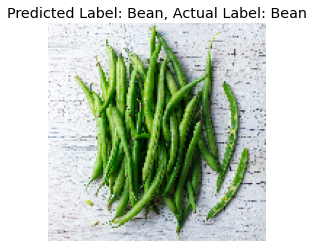

In [ ]:
# Generate predictions for external images
external_image_path_1 = "./beans.jpg?dl=0"
generate_predictions(external_image_path_1, actual_label='Bean')

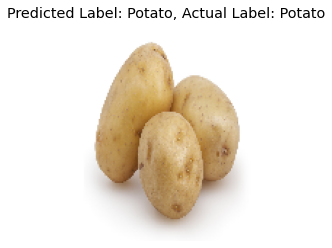

In [ ]:
# Generate predictions for external image
external_image_path_2 = "./potato_2.jpg?dl=0"
generate_predictions(external_image_path_2, actual_label='Potato')